# Step 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load the dataset

In [2]:
df = pd.read_csv('D:\Data\Dataset\cars.csv')

# Step 2: Exploratory Data Analysis

## get a summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

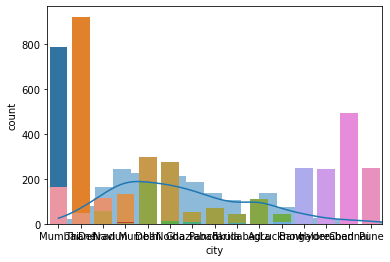

In [4]:
df.info()
df.describe()

sns.histplot(df['price'], kde=True)
sns.histplot(df['distance_travelled(kms)'], kde=True)
sns.histplot(df['car_age'], kde=True)

sns.countplot(df['brand'])
sns.countplot(df['fuel_type'])
sns.countplot(df['city'])


# Step 3: Layout Regression Experiment Space

In [10]:
df = pd.get_dummies(df, drop_first=True)

from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['year', 'distance_travelled(kms)', 'car_age']] = scaler.fit_transform(X_train[['year', 'distance_travelled(kms)', 'car_age']])
X_test[['year', 'distance_travelled(kms)', 'car_age']] = scaler.transform(X_test[['year', 'distance_travelled(kms)', 'car_age']])


# Step 4: Build and Evaluate Regression Models

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print("MSE: ", mean_squared_error(y_test, y_pred_lr))
print("R2 score: ", r2_score(y_test, y_pred_lr))

# ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression")
print("MSE: ", mean_squared_error(y_test, y_pred_ridge))
print("R2 score: ", r2_score(y_test, y_pred_ridge))

# lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression")
print("MSE: ", mean_squared_error(y_test, y_pred_lasso))
print("R2 score: ", r2_score(y_test, y_pred_lasso))

# random forest regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Regression")
print("MSE: ", mean_squared_error(y_test, y_pred_rf))
print("R2 score: ", r2_score(y_test, y_pred_rf))


Linear Regression
MSE:  1533635833132.117
R2 score:  0.54315475599948
Ridge Regression
MSE:  1526822179072.3613
R2 score:  0.5451844330481097
Lasso Regression
MSE:  1536153957596.711
R2 score:  0.5424046475574377


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.094e+14, tolerance: 3.651e+11
  model = cd_fast.enet_coordinate_descent(


Random Forest Regression
MSE:  1079668277430.9423
R2 score:  0.6783843289347107


# Step 5: List Out Most Important Features

In [12]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

feature_importances = dict(zip(X_train.columns, importances))

sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(feature, importance)


brand_rank 0.15545907454445945
distance_travelled(kms) 0.1252517860934555
car_age 0.09376006322808482
year 0.09288427808871895
brand_Lamborghini 0.0765899816580732
brand_Land Rover 0.06377149134243078
brand_Jaguar 0.04386847231788872
brand_Bentley 0.0425515347310799
brand_Volkswagen 0.040901696899409756
brand_Mercedes-Benz 0.0399435738176106
city_Delhi 0.035389616639351716
brand_Volvo 0.029677688072974426
brand_BMW 0.02552877604048539
brand_Toyota 0.016818625663049362
fuel_type_Diesel 0.016243274561075632
city_Pune 0.013636478407535686
brand_Honda 0.012550929427255044
brand_Ford 0.010057405273572531
city_Dehradun 0.009979405775474836
brand_MINI 0.008796156026526548
city_Hyderabad 0.008607779779053703
brand_Porsche 0.008528368236826801
fuel_type_Petrol 0.007344372720162831
city_Mumbai 0.005741048576713822
city_Chennai 0.004384257861038178
brand_Lexus 0.004265234340794544
brand_Maruti Suzuki 0.0019474184560894978
city_Bangalore 0.001829091132919055
city_Faridabad 0.0014460890872379484
ci